In [196]:
import numpy as np
import pandas as pd

from importlib import reload

import matplotlib.pyplot as plt
%matplotlib inline

import analysis

In [197]:
local_data = pd.read_csv('MapFileData-WithCountyResultsAndCovariates.csv')
national_data = pd.read_csv('national_data.csv')

before = 'm.RR_{}_Armed_Versus_Unarmed'
after = 'm.RR_{}_Unarmed_Versus_Armed'

# Create one more column for simplicity with inverse ratios
for r in ['Black', 'White', 'Hispanic']:
    local_data[after.format(r)] = 1. / local_data[before.format(r)]
    national_data[after.format(r)] = 1. / national_data[before.format(r)]

In [198]:
county = 'San Francisco'

# Armed vs. Armed

In [199]:
features = ['m.RR_Black_Armed_Versus_White_Armed', 'm.RR_Hispanic_Armed_Versus_White_Armed']

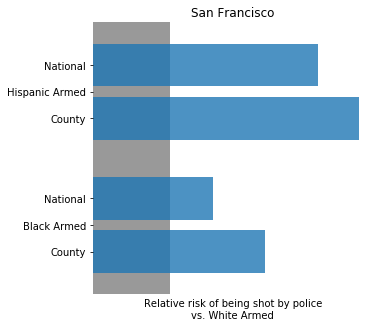

In [200]:
reload(analysis)
plt.close()
f, ax = plt.subplots(1, figsize=(5, 5))

analysis.make_barplot(national_data, local_data, county, features, ax)

# Unarmed vs. Armed

In [181]:
features = ['m.RR_Black_Unarmed_Versus_White_Armed',
            'm.RR_Hispanic_Unarmed_Versus_White_Armed',
            'm.RR_White_Unarmed_Versus_Armed']

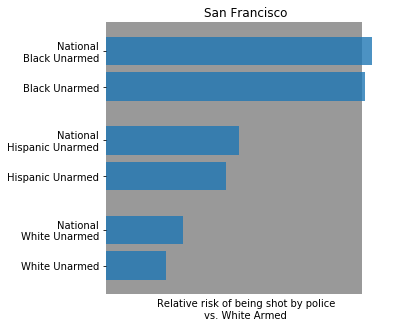

In [182]:
reload(analysis)
plt.close()
f, ax = plt.subplots(1, figsize=(5, 5))

analysis.make_barplot(national_data, local_data, county, features, ax)

# Unarmed vs. Unarmed

In [183]:
features = ['m.RR_Black_Unarmed_Versus_White_Unarmed', 'm.RR_Hispanic_Unarmed_Versus_White_Unarmed']

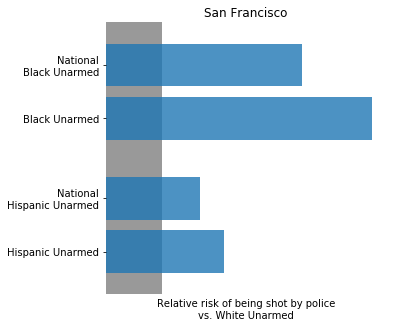

In [184]:
reload(analysis)
plt.close()
f, ax = plt.subplots(1, figsize=(5, 5))

analysis.make_barplot(national_data, local_data, county, features, ax)